In [47]:
## formatting business

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
mpl.rcParams['font.family']= 'sans serif'

<bound method NDFrame.head of     Year  Area Harvested (hectares)  Production (tonnes)                 Flag
0   1961                       6000                18000                  NaN
1   1962                       6000                20000                  NaN
2   1963                       7000                23200  *unverified source*
3   1964                       7000                23200                  NaN
4   1965                       6571                21439                  NaN
5   1966                       5034                22455                  NaN
6   1967                       6400                21134                  NaN
7   1968                       8498                27738  *unverified source*
8   1969                       8094                26417                  NaN
9   1970                       9300                30380                  NaN
10  1971                       8000                28500                  NaN
11  1972                       810

Text(0, 0.5, 'Pineapple Yield (tonnes/hectacre)')

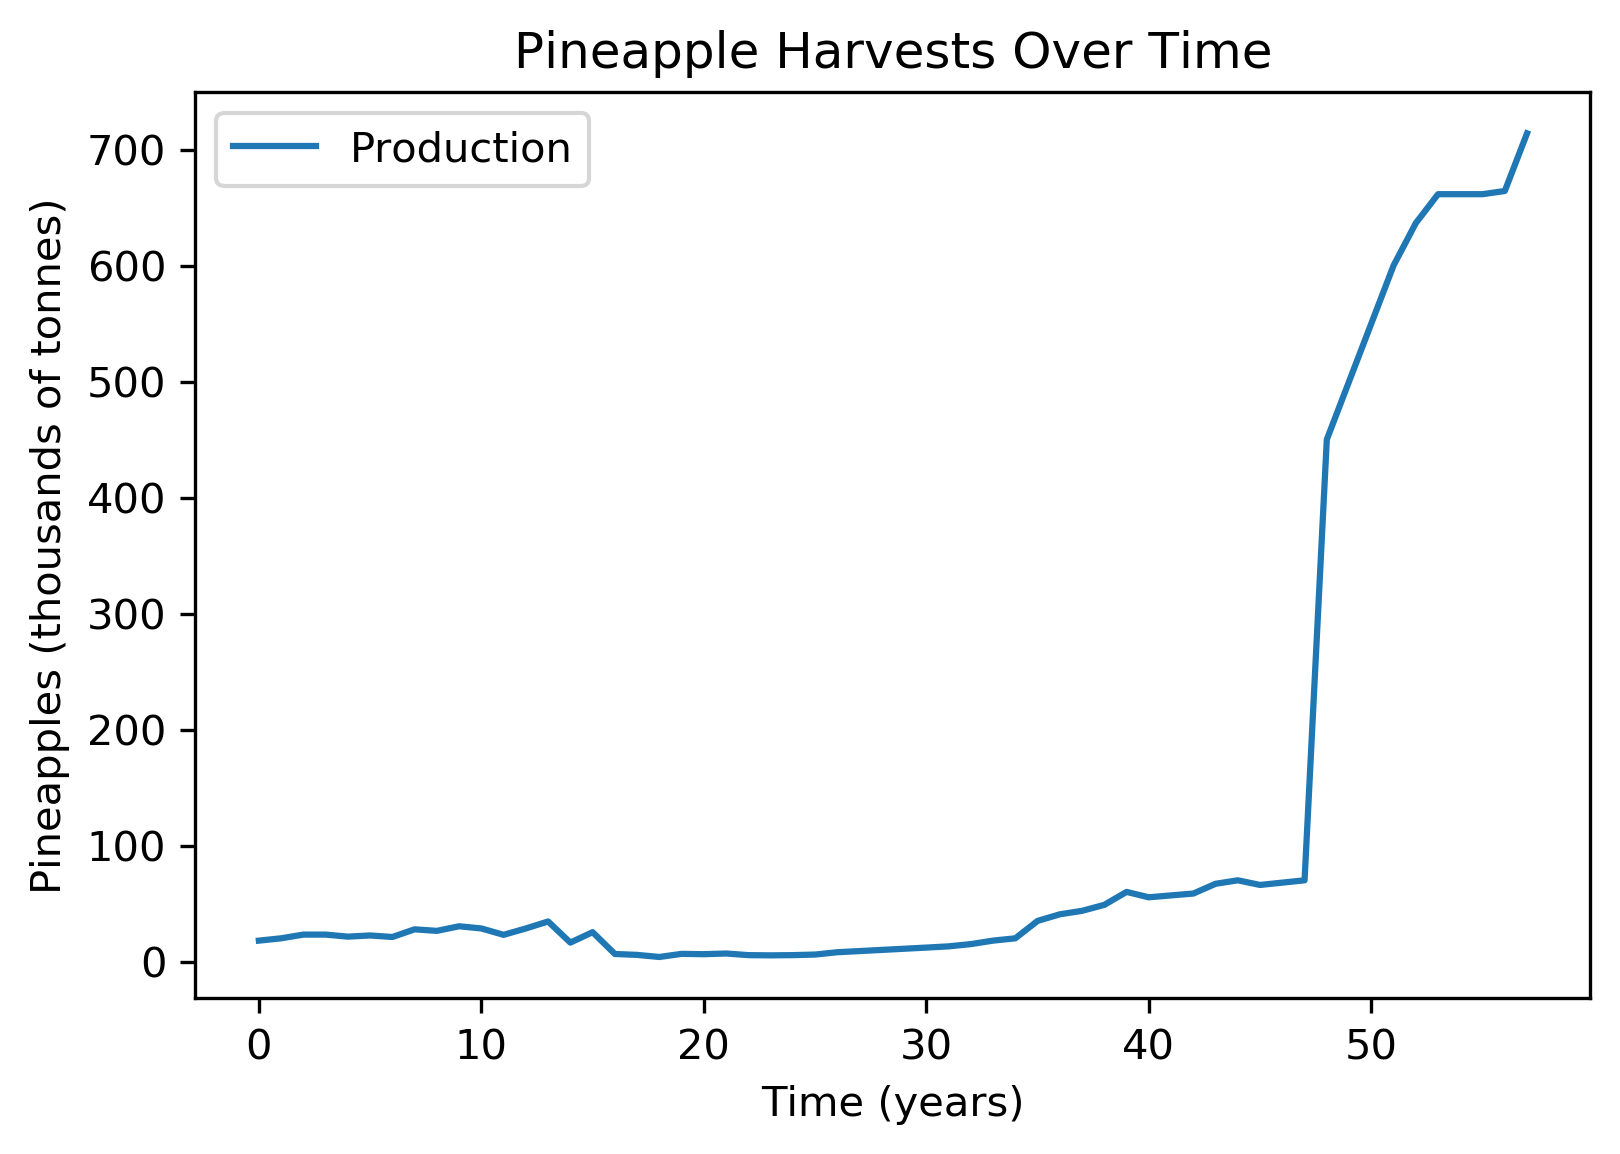

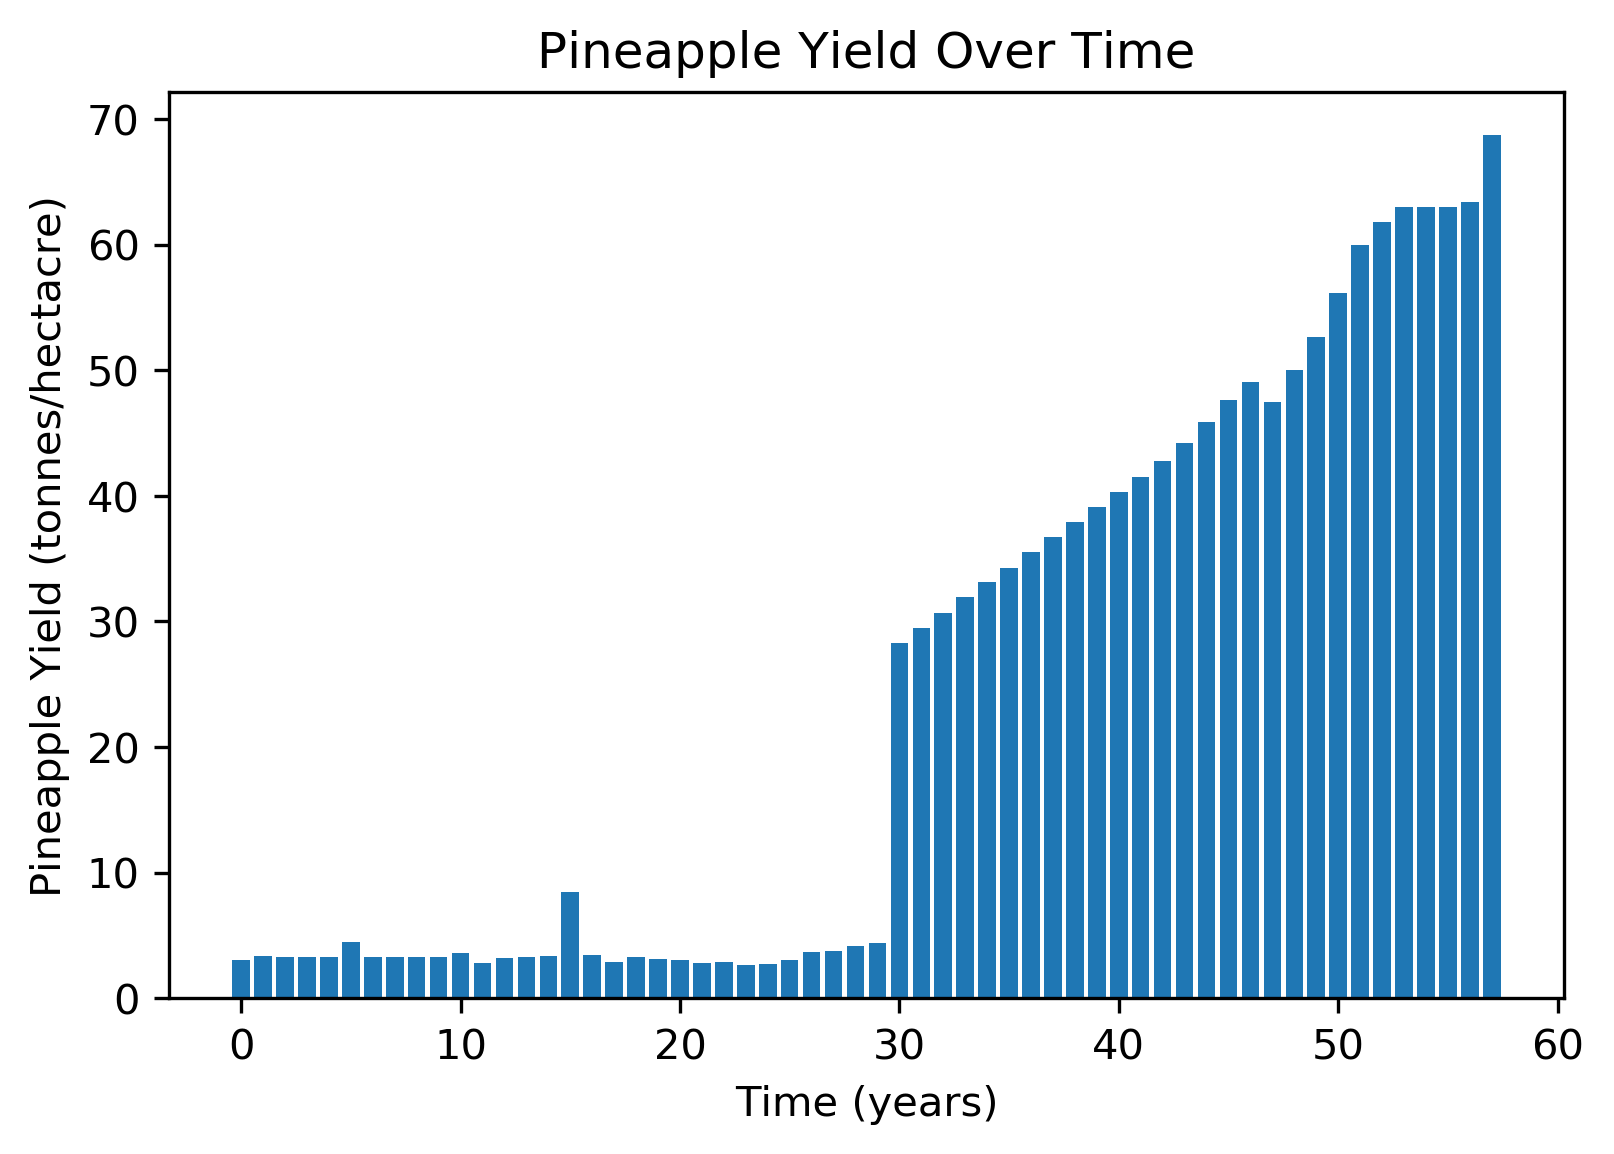

In [51]:
# import modules

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('GhanaPineapples.xls')

# to see data run:
print(df.head)

# choose the data you want and store in lists

Year, Harvest = df['Year'], df['Production (tonnes)']
Harvest_tton = Harvest/1000


## TASK 1 ##

# reads data in from excel file


# manipulate data to show info you want

Time = (Year - 1961)

#plot

plt.figure(1)
plt.plot(Time, Harvest_tton,label='Production')
plt.title('Pineapple Harvests Over Time')
plt.xlabel('Time (years)')
plt.ylabel('Pineapples (thousands of tonnes)')
plt.legend()

## TASK 2 ##

# define pineapple yield

Area = df['Area Harvested (hectares)']
Yield = Harvest/Area

#create plot

plt.figure(2)
plt.bar(Time, Yield)
plt.title('Pineapple Yield Over Time')
plt.xlabel('Time (years)')
plt.ylabel('Pineapple Yield (tonnes/hectacre)')


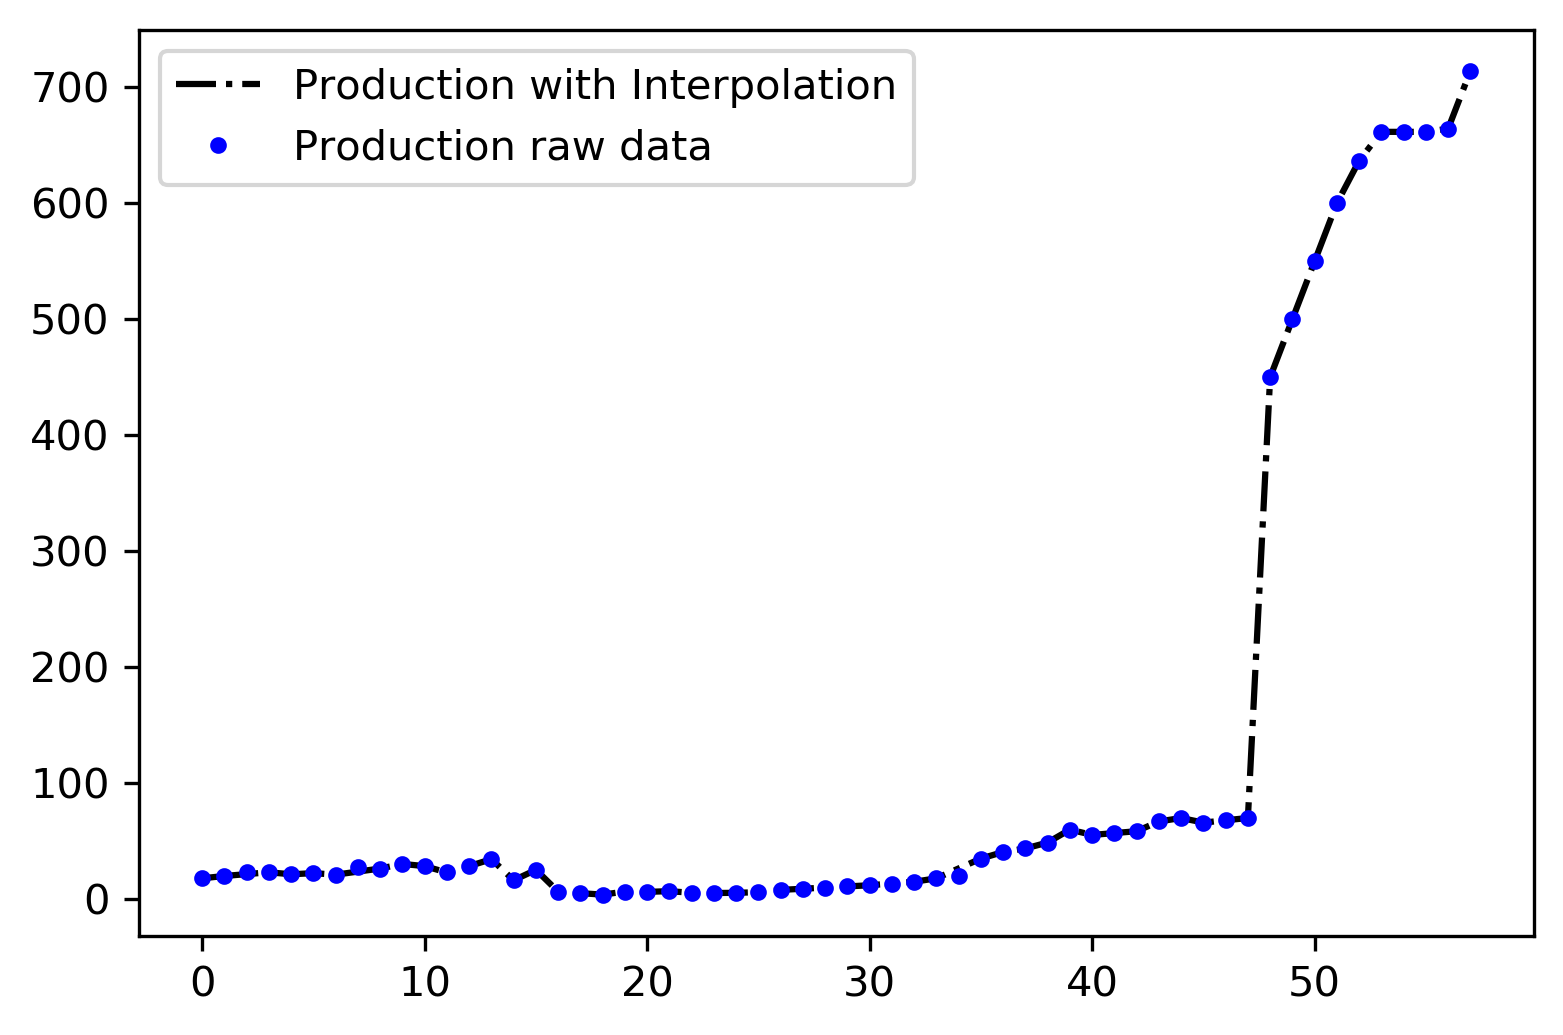

In [60]:
## TASK 3 ##

# create copy instead of rename, called shallow copy
from copy import copy 

# created df again
df = pd.read_excel('GhanaPineapples.xls')

Year, Harvest = df['Year'], df['Production (tonnes)']

# Copy the production data for editing

P_copy = copy(Harvest)

#iterate through data and replace unverified points with interpolated values

for i, row in df.iterrows():
    if row['Flag'] == '*unverified source*':
        P_copy[i] = 0.5*(P_copy[i-1]+P_copy[i+1])
        
# plot old and new

plt.figure(3)
Harvest_tton_interp = P_copy/1000
plt.plot(Time, Harvest_tton_interp,'k-.',label='Production with Interpolation')
plt.plot(Time, Harvest_tton,'b.',label='Production raw data')
plt.legend()
